In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from models.flight_duration import *
from models.get_countries import *
from models.timesplit import *
from models.get_geo_info import *
from models.airport_dummies import *

from models.code_plot import *


In [2]:
# importing airports database for location and timezone
# pip install airportsdata

import airportsdata

airports = airportsdata.load()  # key is ICAO code, the default
df_1 = pd.DataFrame(airports).transpose()

df_1.head(3)

,icao,iata,name,city,subd,country,elevation,lat,lon,tz
00AK,00AK,,Lowell Field,Anchor Point,Alaska,US,450.0,59.9492,-151.695999,America/Anchorage
00AL,00AL,,Epps Airpark,Harvest,Alabama,US,820.0,34.864799,-86.770302,America/Chicago
00AZ,00AZ,,Cordes Airport,Cordes,Arizona,US,3810.0,34.305599,-112.165001,America/Phoenix


### Task-1
- Convert 'dep_date' datatype and extract months, year and days
- Country names are included
- Flight duration is calculated

In [3]:
# importing Training data
df = pd.read_csv('data/Train.csv')

df.head(3)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0


In [4]:
# importing Airports database for 'IATA'

airports = airportsdata.load('IATA')
airports_df = pd.DataFrame(airports).transpose()

airports_df.head(3)

,icao,iata,name,city,subd,country,elevation,lat,lon,tz
ICY,19AK,ICY,Icy Bay Airport,Icy Bay,Alaska,US,50.0,59.969002,-141.662003,America/Anchorage
HGZ,2AK6,HGZ,Hog River Airport,Hogatza,Alaska,US,534.0,66.216103,-155.669006,America/Anchorage
BYW,38WA,BYW,Blakely Island Airport,Blakely Island,Washington,US,66.0,48.578999,-122.825996,America/Los_Angeles


In [5]:
# Feature engineering

# flight duration in minutes
df = flight_duration(df,"scheduled_time_dep", "scheduled_time_arr")

# Country names are included
df = get_geo_info(df,airports_df)

# Convert 'dep_date' datatype and extract months, year and days
df_1 = timeSplit(df,"dep_date",df.ID)
df = df_1.merge(df, on="ID")

# cleaning dataframe 
df = code_plot(df)

In [6]:
# Basic EDA 

def EDA(df):
    print(" ")
    print("-----Data Shape-------------")
    print(df.shape)
    print(" ")
    print("----------Data Types-----------")
    print(df.dtypes)
    print(" ")
    print("----------INFO-----------------")
    print(df.info())
    print(" ")
    print("-------Missing Values----------")
    print(df.isnull().sum())

In [ ]:
EDA(df)

In [13]:
df[(df['DEPSTN'] == df['ARRSTN'])]

,year,month,weekday,FLTID,DEPSTN,ARRSTN,Flight_status,AC,target,flight_duration,dep_country,arr_country,day_name,National_International_Flight,dep_hour,arr_hour,dep_AM/PM,arr_AM/PM,flight_ID
298,2016,4,5,TU 9004,DJE,DJE,RTR,TU 736,35.0,50.0,TN,TN,Saturday,National,3,4,AM,AM,TU
418,2016,7,5,TU 0744,TUN,TUN,RTR,TU 320,3.0,155.0,TN,TN,Saturday,National,7,9,AM,AM,TU
461,2016,8,0,TU 0526,TUN,TUN,RTR,TU 736,17.0,165.0,TN,TN,Monday,National,6,9,AM,AM,TU
1107,2016,4,0,TU 0712,CMN,CMN,RTR,TU 32A,10.0,145.0,MA,MA,Monday,National,10,13,AM,PM,TU
1294,2016,6,3,TU 9975,TUN,TUN,ATA,TU 736,135.0,60.0,TN,TN,Thursday,National,10,11,AM,AM,TU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107821,2018,1,2,WKL 0000,TUN,TUN,SCH,TU 320,0.0,180.0,TN,TN,Wednesday,National,15,18,PM,PM,WKL
107825,2018,8,2,WKL 0000,TUN,TUN,SCH,TU 320,0.0,180.0,TN,TN,Wednesday,National,22,1,PM,AM,WKL
107827,2018,12,2,SGT 0000,TUN,TUN,SCH,TU 736,0.0,120.0,TN,TN,Wednesday,National,23,1,PM,AM,SGT
107828,2018,7,3,WKL 0000,TUN,TUN,SCH,TU 32A,0.0,180.0,TN,TN,Thursday,National,23,2,PM,AM,WKL


In [16]:
df[(df['flight_duration']>0) & (df['flight_duration']<30) & (df['DEPSTN'] == df['ARRSTN'])]

,year,month,weekday,FLTID,DEPSTN,ARRSTN,Flight_status,AC,target,flight_duration,dep_country,arr_country,day_name,National_International_Flight,dep_hour,arr_hour,dep_AM/PM,arr_AM/PM,flight_ID
44399,2017,3,1,TU 9952,TUN,TUN,ATA,TU 32A,11.0,25.0,TN,TN,Tuesday,National,5,5,AM,AM,TU
66674,2017,10,3,AOG 0000,TUN,TUN,SCH,TU 736,0.0,28.0,TN,TN,Thursday,National,13,14,PM,PM,AOG
68831,2017,9,0,AOG 0000,DJE,DJE,SCH,TU 736,0.0,25.0,TN,TN,Monday,National,14,14,PM,PM,AOG
68852,2017,3,2,AOG 0000,TUN,TUN,SCH,TU 32A,0.0,26.0,TN,TN,Wednesday,National,15,15,PM,PM,AOG
103728,2018,7,1,AOG 0000,MIR,MIR,SCH,TU 736,0.0,28.0,TN,TN,Tuesday,National,6,6,AM,AM,AOG
103943,2018,5,0,AOG 0000,TUN,TUN,SCH,TU 32A,0.0,18.0,TN,TN,Monday,National,8,8,AM,AM,AOG
105121,2018,5,1,AOG 0000,DJE,DJE,SCH,TU 32A,0.0,26.0,TN,TN,Tuesday,National,14,15,PM,PM,AOG
105246,2018,8,4,AOG 0000,TUN,TUN,SCH,TU 32A,0.0,20.0,TN,TN,Friday,National,14,15,PM,PM,AOG
106409,2018,10,1,AOG 0000,TUN,TUN,SCH,TU 32A,0.0,10.0,TN,TN,Tuesday,National,8,8,AM,AM,AOG


In [20]:
# percentage of delayed flights in the dataset

percenatge_delay = round(len(df[df['target']!=0])/len(df)*100, 2)
percenatge_delay

64.6

---
### Visualization

- Number of International and National Flight delays in the dataset
    * Percentage of International flight delay in Dataset
- Delayed Flight count per year, month and week days
- Top-5 Flight IDs delay count
- Top-5 Aircraft's delay count for International and national flights
- Hourly Flight delay count

In [21]:
df_delay = df[df['target']!=0]
df_no_delay = df[df['target']==0]

In [167]:
# No. of International and National Flight delays in the dataset

df_delay.National_International_Flight.value_counts()

International    66720
National          2945
Name: National_International_Flight, dtype: int64

In [173]:
# %age of International flight in Dataset

len(df_delay[df_delay['National_International_Flight'] == 'International'])/len(df_delay)*100

95.77262613938132

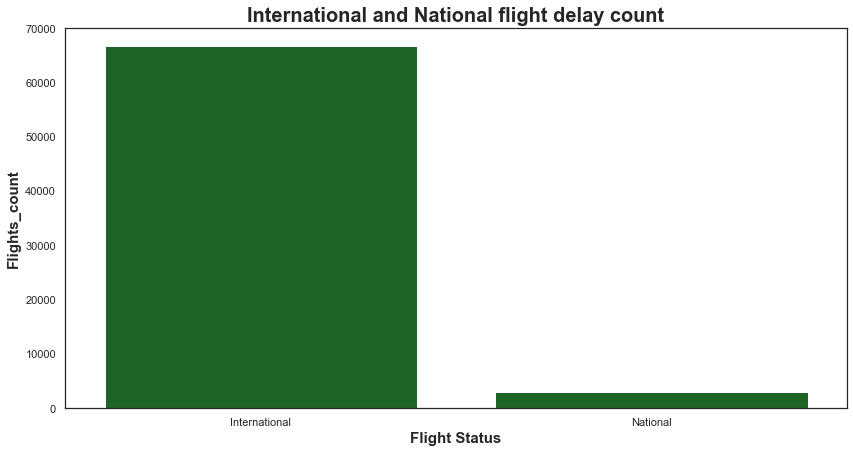

In [177]:
# International and National flight delay count

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

sns.countplot(x='National_International_Flight', data=df_delay , palette=['g'])

plt.xlabel('Flight Status', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('International and National flight delay count', size=20, weight='bold');

In [160]:
# Delayed Flight count per year

df_delay.year.value_counts().sort_index()

2016    20422
2017    24317
2018    24926
Name: year, dtype: int64

In [181]:
# National_International_Flight delays count per year

df_delay.groupby(['year', 'National_International_Flight']).size().reset_index(name='count')

,year,National_International_Flight,count
0,2016,International,19491
1,2016,National,931
2,2017,International,23256
3,2017,National,1061
4,2018,International,23973
5,2018,National,953


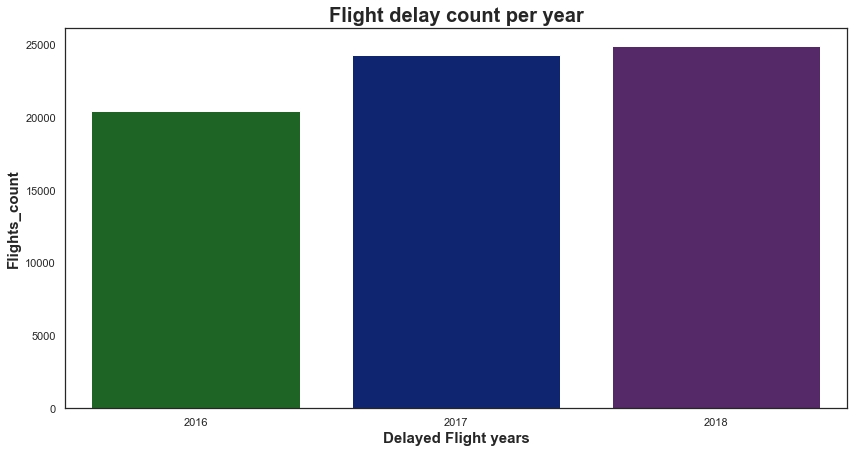

In [159]:
# Delayed Flight count per year

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

# palette=['g', 'b', 'm', 'c', 'y']

sns.countplot(x='year', data=df_delay , palette=['g', 'b', 'm'])

#plt.legend(loc='upper right', title='Aircrafts Types')

plt.xlabel('Delayed Flight years', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('Flight delay count per year', size=20, weight='bold');

In [145]:
# Average Flight delays per year

df_delay.groupby('year', as_index=False)['target'].mean()

,year,target
0,2016,55.493096
1,2017,80.493646
2,2018,86.832344


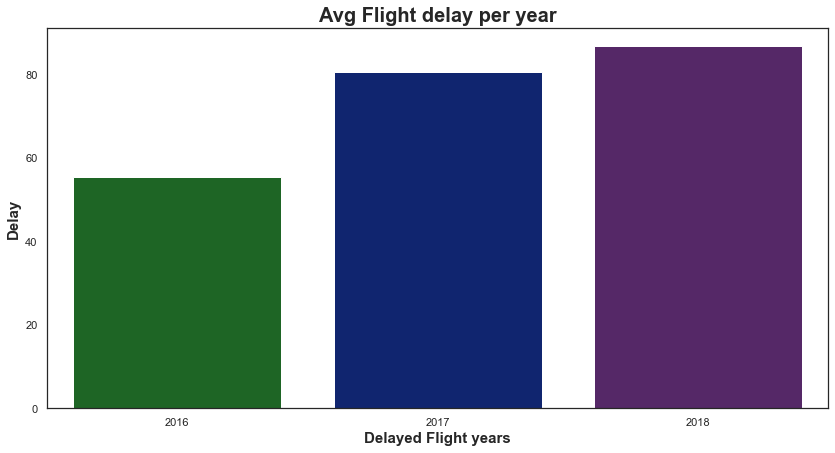

In [157]:
# Average Flight delays per year

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

plot = sns.barplot(x='year', y='target', data=df_delay, ci=None, palette=['g', 'b', 'm'])

plt.xlabel('Delayed Flight years', size=15, weight='bold')
plt.ylabel('Delay', size=15, weight='bold')
plt.title('Avg Flight delay per year', size=20, weight='bold');

In [151]:
# Per Month Delayed Flight count

df_delay.month.value_counts().sort_index()

1     5545
2     2899
3     5838
4     6224
5     4285
6     5662
7     8420
8     9238
9     5228
10    5783
11    4729
12    5814
Name: month, dtype: int64

In [ ]:
# National_International_Flight delays count per month

df_delay.groupby(['month', 'National_International_Flight']).size().reset_index(name='count')

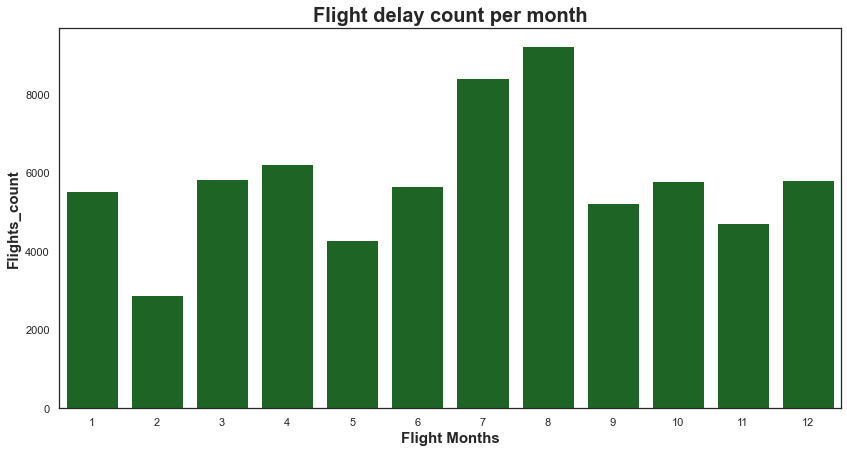

In [153]:
# Per Month Delayed Flight count

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

# palette=['g', 'b', 'm', 'c', 'y']

sns.countplot(x='month', data=df_delay, palette=['g'])

#plt.legend(loc='upper right', title='Aircrafts Types')

plt.xlabel('Flight Months', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('Flight delay count per month', size=20, weight='bold');

In [165]:
# Week day Flight count delays

df_delay.day_name.value_counts().reset_index()

,index,day_name
0,Sunday,11699
1,Saturday,11163
2,Friday,10969
3,Monday,10406
4,Thursday,9935
5,Tuesday,7756
6,Wednesday,7737


In [ ]:
# National_International_Flight delays count per week day

df_delay.groupby(['day_name', 'National_International_Flight']).size().reset_index(name='count')

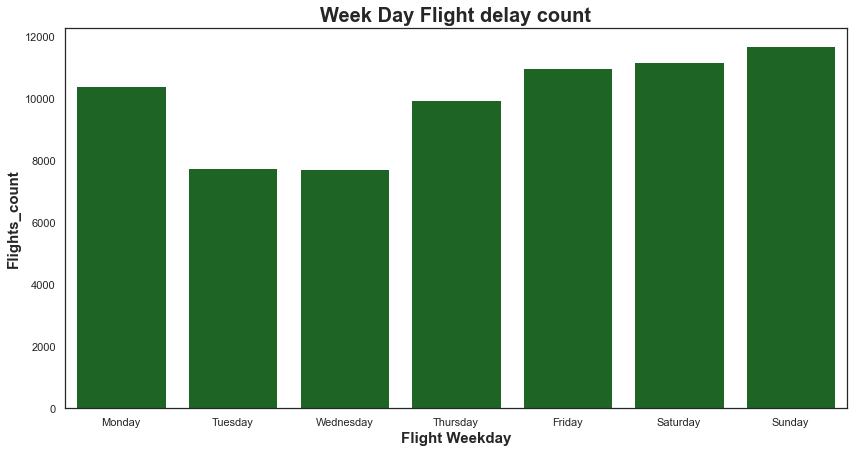

In [166]:
# Week day Flight count delays

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x = "day_name", data = df_delay, order = day_order, palette=['g'])

plt.xlabel('Flight Weekday', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('Week Day Flight delay count', size=20, weight='bold');

In [178]:
# Delay count for top 5 flight IDs

df_aircraft = df_delay.FLTID.value_counts().reset_index(name='count').head()
df_aircraft

,index,count
0,TU 0613,1221
1,TU 0397,1034
2,TU 0722,913
3,TU 0216,895
4,TU 0717,883


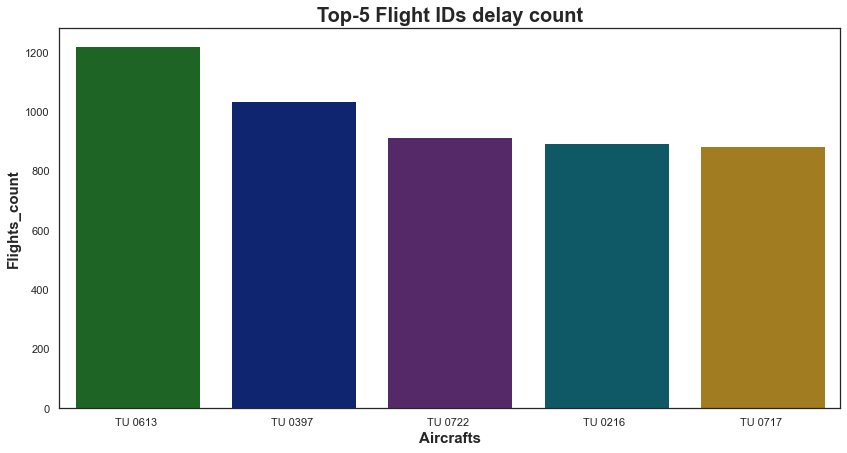

In [241]:
# Delay count for top 5 flight IDs

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

plot = sns.barplot(x='index', y='count', data=df_aircraft, ci=None, palette=['g', 'b', 'm', 'c', 'y'])

plt.xlabel('Aircrafts', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('Top-5 Flight IDs delay count', size=20, weight='bold');

In [238]:
# Top-5 Aircrafts delay count for International and national flights

df_delay.groupby(['AC', 'National_International_Flight']).size().sort_values(ascending=False).head()

AC      National_International_Flight
TU 32A  International                    23070
TU 320  International                    20336
TU 736  International                    11026
TU 31B  International                     4500
TU 332  International                     4053
dtype: int64

In [234]:
# Database is created for Top-5 Aircrafts delay count for International and national flights

df_air = df_delay.query("AC == 'TU 32A' | AC == 'TU 320' | AC == 'TU 736' | AC == 'TU 31B' | AC == 'TU 332'")

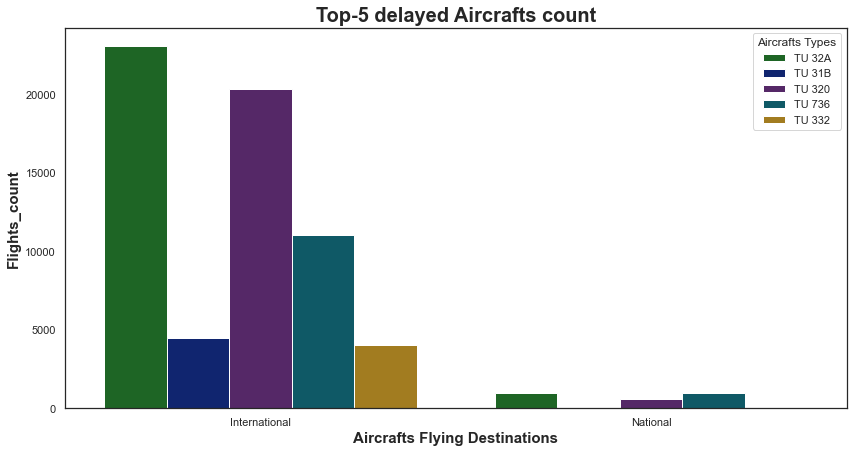

In [239]:
# Top-5 Aircrafts delay count for International and national flights

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

sns.countplot(x='National_International_Flight', hue='AC', data=df_air, palette=['g', 'b', 'm', 'c', 'y'])

plt.legend(loc='upper right', title='Aircrafts Types')

plt.xlabel('Aircrafts Flying Destinations', size=15, weight='bold')
plt.ylabel('Flights_count', size=15, weight='bold')
plt.title('Top-5 delayed Aircrafts count', size=20, weight='bold');

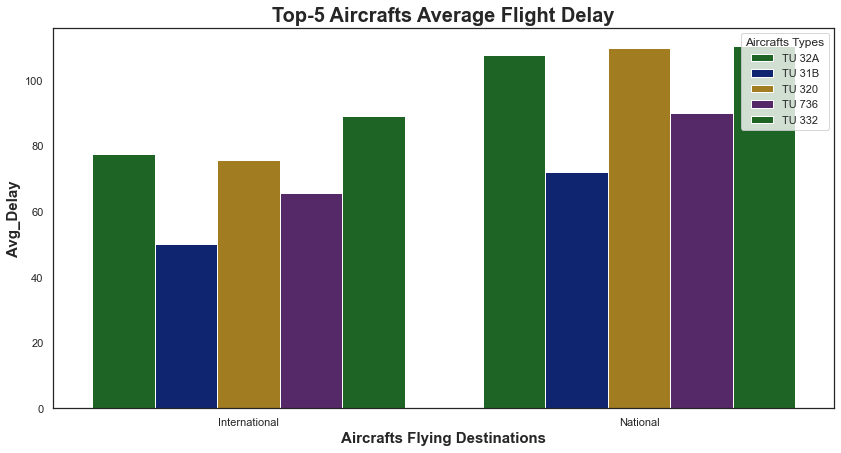

In [240]:
# Top-5 Aircrafts Avg delay for International and national flights

# palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

plot = sns.barplot(x='National_International_Flight', y='target', hue='AC', data=df_air, ci=None, palette=['g', 'b', 'y', 'm'])

plt.legend(loc='upper right', title='Aircrafts Types')

#plt.margins(0)

plt.xlabel('Aircrafts Flying Destinations', size=15, weight='bold')
plt.ylabel('Avg_Delay', size=15, weight='bold')
plt.title('Top-5 Aircrafts Average Flight Delay', size=20, weight='bold');

In [186]:
# Hourly Flight delay count

df_hr_dep = df_delay.groupby(['dep_hour']).size().reset_index(name='count')
df_hr_dep

,dep_hour,count
0,0,1446
1,1,688
2,2,242
3,3,164
4,4,433
5,5,859
6,6,3760
7,7,4993
8,8,4678
9,9,3406


In [ ]:
# Hourly Flight delay count for International and National flights

df_delay.groupby(['dep_hour', 'National_International_Flight']).size().reset_index(name='count')

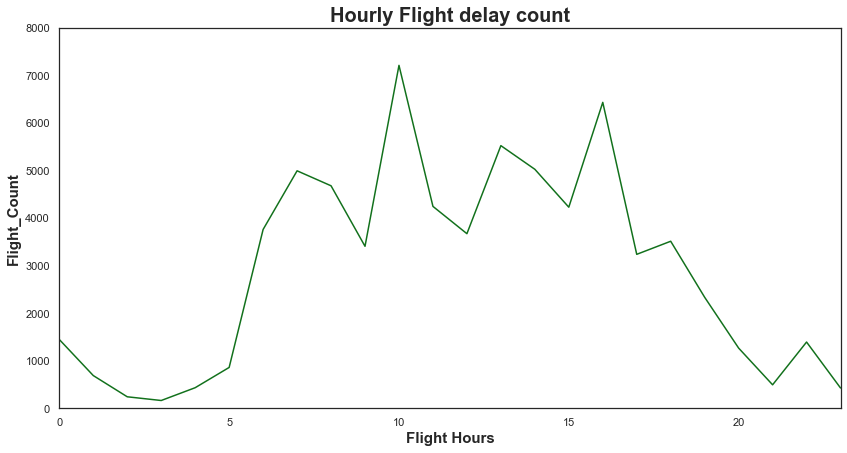

In [232]:
# Hourly Flight delay count

#palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

sns.lineplot(x='dep_hour', y='count', data=df_hr_dep, ci=None, color='g')

plt.margins(0)

plt.xlabel('Flight Hours', size=15, weight='bold')
plt.ylabel('Flight_Count', size=15, weight='bold')
plt.title('Hourly Flight delay count', size=20, weight='bold')
plot.set_xticks(range(0,26,6))
plt.ylim(0, 8000);

In [227]:
# Hourly Average Flight Delay

df_delay.groupby(['dep_hour'])['target'].mean()

dep_hour
0     115.942600
1     115.781977
2     112.512397
3      72.573171
4      92.870670
5      70.954598
6      44.309309
7      45.169237
8      58.493801
9      59.145919
10     57.491123
11     68.459128
12     72.019886
13     72.496197
14     83.073831
15     81.330889
16     94.444652
17     95.851097
18     85.932232
19    112.803770
20     94.629542
21    120.520243
22    112.481694
23    117.615925
Name: target, dtype: float64

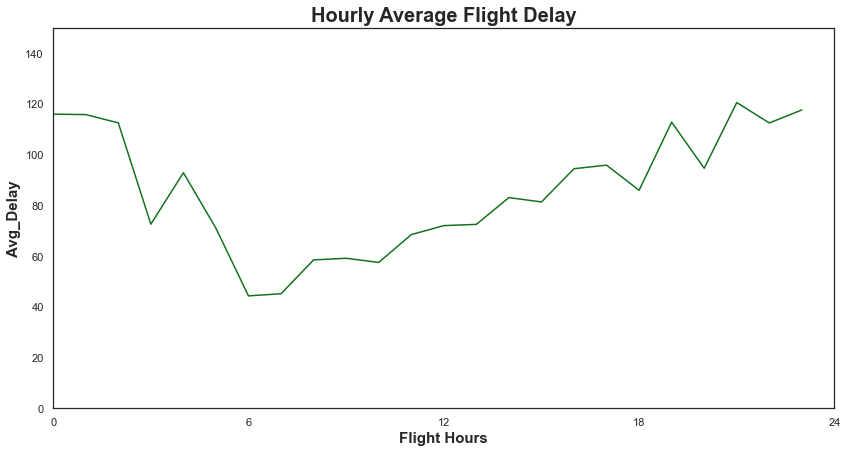

In [231]:
# Hourly Average Flight Delay

#palette=['g', 'b', 'm', 'c', 'y']

sns.set_theme(style='white')
sns.set_color_codes("dark")

plt.subplots(figsize=(14,7))

plot = sns.lineplot(x='dep_hour', y='target', data=df_delay, ci=None, color='g')

plt.margins(0)

plt.xlabel('Flight Hours', size=15, weight='bold')
plt.ylabel('Avg_Delay', size=15, weight='bold')
plt.title('Hourly Average Flight Delay', size=20, weight='bold')
plot.set_xticks(range(0,25,6))
plt.ylim(0, 150);